In [2]:
lines = [line for line in open("sensor_data_200.txt","r")]  ### fig:read_sensor_data
print(lines[:3])

['20180122 095819 305 214\n', '20180122 095822 299 211\n', '20180122 095826 292 199\n']


In [3]:
import pandas as pd

data = pd.read_csv("sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))
print(data)

           date    time   ir  lidar
0      20180122   95819  305    214
1      20180122   95822  299    211
2      20180122   95826  292    199
3      20180122   95829  321    208
4      20180122   95832  298    212
...         ...     ...  ...    ...
58983  20180124  120023  313    208
58984  20180124  120026  297    200
58985  20180124  120030  323    204
58986  20180124  120033  326    207
58987  20180124  120036  321    208

[58988 rows x 4 columns]


In [4]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


max: 229, min: 193


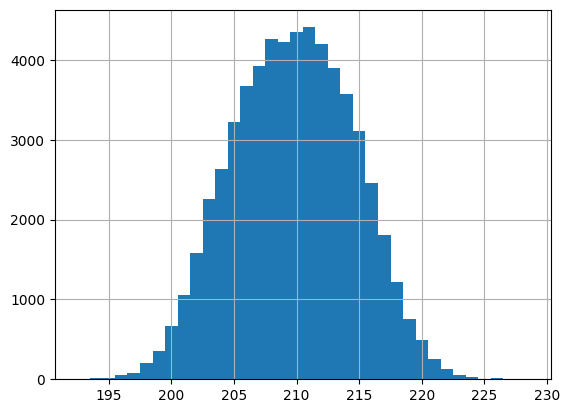

In [5]:
import matplotlib.pyplot as plt

lidar_data = data["lidar"]
print(f'max: {max(lidar_data)}, min: {min(lidar_data)}')
data["lidar"].hist(bins = max(lidar_data) - min(lidar_data), align="left")
plt.show()

In [6]:
mean = data["lidar"].mean()
print(f'mean: {mean}')

mean: 209.73713297619855


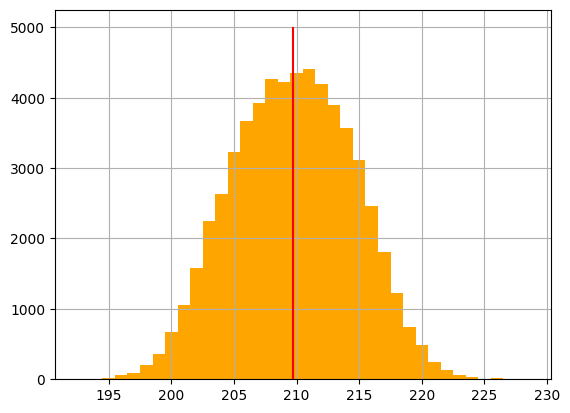

In [7]:
data["lidar"].hist(bins = max(lidar_data) - min(lidar_data), align="left", color="orange")
plt.vlines(mean, ymin=0, ymax=5000, color="red")
plt.show()

In [11]:
variace = data["lidar"].var()
std = data["lidar"].std()
print(f'variance: {variace}, std: {std}')
print(f'values: {mean} ± {std}')

variance: 23.408106598554504, std: 4.838192492920729
values: 209.73713297619855 ± 4.838192492920729


In [15]:
freqs = pd.DataFrame(data["lidar"].value_counts());
freqs_t = freqs.transpose()
print(freqs_t)

lidar   211   210   208   209   212   207   213   206   214   205  ...  197  \
count  4409  4355  4261  4228  4201  3920  3897  3674  3572  3225  ...   84   

lidar  196  223  224  226  195  194  193  227  229  
count   59   55   32   15   13   10    4    3    1  

[1 rows x 35 columns]


In [20]:
freqs["probs"] = freqs["count"]/len(data["lidar"])
print(freqs.transpose())

lidar          211          210          208          209          212  \
count  4409.000000  4355.000000  4261.000000  4228.000000  4201.000000   
probs     0.074744     0.073829     0.072235     0.071676     0.071218   

lidar          207          213          206          214          205  ...  \
count  3920.000000  3897.000000  3674.000000  3572.000000  3225.000000  ...   
probs     0.066454     0.066064     0.062284     0.060555     0.054672  ...   

lidar        197     196        223        224        226       195       194  \
count  84.000000  59.000  55.000000  32.000000  15.000000  13.00000  10.00000   
probs   0.001424   0.001   0.000932   0.000542   0.000254   0.00022   0.00017   

lidar       193       227       229  
count  4.000000  3.000000  1.000000  
probs  0.000068  0.000051  0.000017  

[2 rows x 35 columns]


In [23]:
print(sum(freqs["probs"]))

1.0


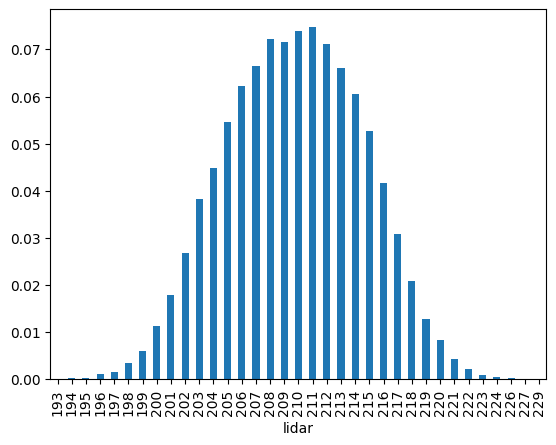

In [30]:
# センサの確率分布図
freqs["probs"].sort_index().plot.bar()
plt.show()

In [43]:
def drawing():
    # n: サンプル個数、weights: データフレームの確率が入っている列, index[0]: ０番目に入っているindexの値（センサ値）を出す
    return freqs.sample(n=1, weights="probs").index[0]
print(drawing())

214


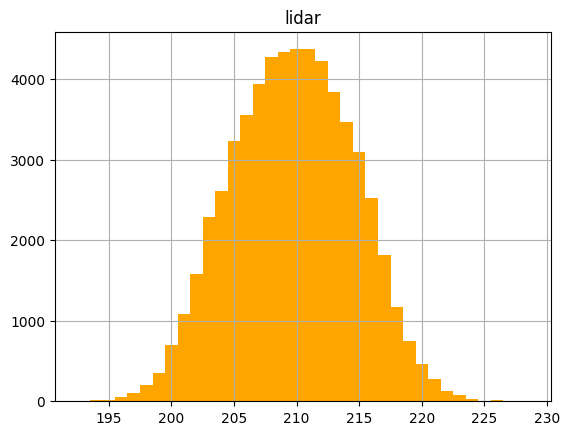

In [47]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])

sim_data = simulated["lidar"]
simulated.hist(bins = max(sim_data) - min(sim_data), color="orange", align="left")
plt.show()

In [52]:
import math

def p(z, mu=209.7, dev=23.4):
    # ガウス分布計算関数
    return math.exp(-(z-mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

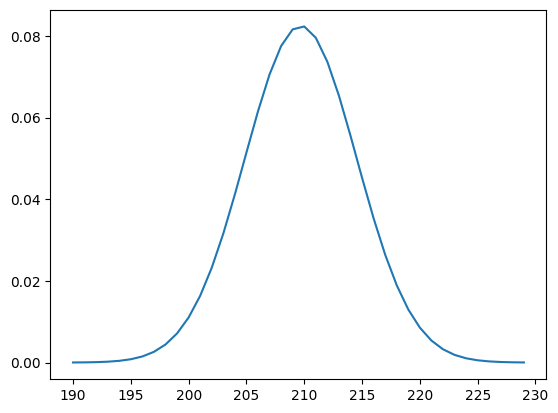

In [53]:
# ガウス分布プロット
zs=range(190, 230)
ys=[p(z) for z in zs]
plt.plot(zs, ys)
plt.show()

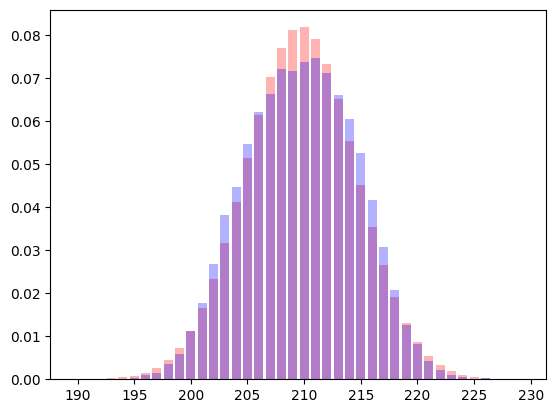

In [57]:
# 整数になる範囲で積分し、確率分布を出す
def prob(z, width=0.5):
    return width*(p(z-width) + p(z+width))

zs=range(190, 230)
ys=[prob(z) for z in zs]

plt.bar(zs, ys, color="red", alpha=0.3)
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()